In [2]:
# libraries
import os
import sys
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams.update({'figure.max_open_warning': 0})

In [ ]:
def fast_plot(data, rolling=1, alpha=0.5, figsize=(12, 4), new_figure=True, title=None, label=None):
    data = data.rolling(rolling).mean()
    with plt.style.context(base_context):
        if new_figure:
            plt.figure(figsize=figsize)
        plt.scatter(data.index, data, alpha=alpha)
        plt.plot(data.index, data, linewidth=2, label=label)
        if title is not None:
            plt.title(title)


def fast_legend(ncol=3, pos=(0.5, -0.15), fontsize=16):
    return plt.legend(loc='upper center', ncol=ncol, bbox_to_anchor=pos, fontsize=fontsize)

In [4]:
# Считывание данных по 1 кейсу
# https://github.com/romanpuzevich/project-mipt-ml/blob/master/project-mipt-ml/data/raw/first_case/train_unlabeled.xlsx 
# https://github.com/romanpuzevich/project-mipt-ml/blob/master/project-mipt-ml/data/raw/first_case/train_labeled.xlsx 

train_unlabeled = pd.read_excel('/content/train_unlabeled.xlsx', parse_dates=True, engine='openpyxl')
train_labeled = pd.read_excel('/content/train_labeled.xlsx', parse_dates=True, engine='openpyxl')

In [5]:
# Работа с неразмеченным датасетом
# Просмотр колонок
print(train_unlabeled.columns)
# Переименование для удобства
# train_unlabeled.rename(columns = {'Параметр':'Дата_время'}, inplace = True)
# Выявлено: отсутствие колонок x003, x004, x027, x028

# Типы колонок и null значения
display(train_unlabeled.info())
# Выявлено: 
# 1. Дата_время datetime64[ns], остальные float64
# 2. Нет np.NaN значений в данных

# Общая статистика
display(train_unlabeled.describe().T)
# Выявлено:
# 1. В x008, x010, x023, x024, x025, x029, x048 подозрения на выбросы в данных - отрицательное минимальное значение
# 2. В x002, x017, x036, x038, x039 подозрения на выбросы - очень большие значения max 

# Работа с размеченным датасетом и сравнение
display(train_labeled.describe().T)
# Выявлены следующие расхождения:
# 1. В столбцах представленных выше действительно присутсвуют выбросы, подозрения подтвердились
# 2. Стоит так же обратить внимание на все столбцы, где минимальное значение меньше 530 или максимальное больше 621

Index(['Параметр', 'х001', 'х002', 'х005', 'х006', 'х007', 'х008', 'х009',
       'х010', 'х011', 'х012', 'х013', 'х014', 'х015', 'х016', 'х017', 'х018',
       'х019', 'х020', 'х021', 'х022', 'х023', 'х024', 'х025', 'х026', 'х029',
       'х030', 'х031', 'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х038',
       'х039', 'х040', 'х041', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047',
       'х048'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37339 entries, 0 to 37338
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Параметр  37339 non-null  datetime64[ns]
 1   х001      37339 non-null  float64       
 2   х002      37339 non-null  float64       
 3   х005      37339 non-null  float64       
 4   х006      37339 non-null  float64       
 5   х007      37339 non-null  float64       
 6   х008      37339 non-null  float64       
 7   х009      37339 non-null  float64       
 8

None

,count,mean,std,min,25%,50%,75%,max
х001,37339.0,5.657179e+02,1.083392e+01,5.460900e+02,557.110,561.07,576.070,6.040300e+02
х002,37339.0,1.446599e+06,2.794209e+08,4.370000e+01,561.310,565.43,578.100,5.399335e+10
х005,37339.0,5.704203e+02,2.141087e+01,3.323500e+01,556.470,562.84,587.760,6.231700e+02
х006,37339.0,5.667464e+02,3.370408e+01,5.787000e-01,548.100,555.39,593.720,6.158800e+02
х007,37339.0,5.693633e+02,2.479516e+01,2.195100e+02,548.380,555.45,597.485,6.155400e+02
х008,37339.0,-8.516564e+26,1.645681e+29,-3.180000e+31,578.540,584.12,596.735,6.141600e+02
х009,37339.0,5.900476e+02,2.871668e+01,7.820000e+01,581.010,587.08,604.550,6.225800e+02
х010,37339.0,-8.864726e+26,1.712958e+29,-3.310000e+31,577.500,584.24,604.350,6.219800e+02
х011,37339.0,5.867132e+02,1.685784e+01,8.049100e+01,576.840,582.72,600.000,6.179600e+02
х012,37339.0,5.882019e+02,1.220298e+01,7.390400e+00,579.480,583.84,599.400,6.168800e+02


,count,mean,std,min,25%,50%,75%,max
х001,36816.0,565.693678,10.794540,546.09,557.1100,561.075,576.0825,604.03
х002,36816.0,569.202619,9.719493,543.02,561.3500,565.460,578.1600,597.72
х005,36816.0,570.729444,16.452039,544.39,556.4800,562.860,587.7300,617.25
х006,36816.0,567.753621,22.934354,534.70,548.1200,555.330,593.7700,615.88
х007,36816.0,569.446377,24.117818,538.90,548.3800,555.350,597.5800,615.53
х008,36816.0,586.921805,10.859237,565.32,578.6000,584.180,596.8000,614.16
х009,36816.0,591.338238,12.765092,568.32,581.0500,587.120,604.6000,621.46
х010,36816.0,589.064051,14.031915,565.03,577.5100,584.280,604.4100,620.89
х011,36816.0,587.174694,12.655353,564.49,576.8800,582.825,600.0500,617.96
х012,36816.0,588.337294,11.734478,564.00,579.5200,583.920,599.5300,616.88


In [6]:
def get_exp(df, time='Параметр', measurement=pd.to_timedelta('0 days 00:10:00')):
    experiments = {}
    count = 1
    index = sorted(df.index.tolist())
    for i, ind in enumerate(index):
        if i == 0:
            begin = df[f"{time}"][ind]
            continue

        if i == len(df) - 2:
            experiments[count] = [begin, df[f"{time}"][index[i + 1]]]
            break

        if (df[f"{time}"][index[i + 1]] - df[f"{time}"][ind]) > measurement:
            experiments[count] = [begin, df[f"{time}"][ind]]
            begin = df[f"{time}"][index[i + 1]]
            count += 1

    return experiments


def experimental_stat(unlabeled, labeled):
    columns = ['Experiment', 'Start', 'Duration', 'Total_rows', 'Clear_rows', 'Percantage_release']
    df = pd.DataFrame(columns=columns)

    info = get_exp(unlabeled)
    for i in info.keys():

        rows = unlabeled.query(f"Параметр >= '{info[i][0]}' and Параметр <= '{info[i][1]}'").shape[0]
        clear_rows = labeled.query(f"Параметр >= '{info[i][0]}' and Параметр <= '{info[i][1]}'").shape[0]
        percantage = np.round((1 - clear_rows / rows) * 100, 2)

        values = np.array([i, info[i][0], info[i][1] - info[i][0], rows, clear_rows, percantage]).reshape(1, -1)

        exp = pd.DataFrame(columns=columns, data=values)

        df = pd.concat([df, exp])

    return df

display(experimental_stat(train_unlabeled, train_labeled))
# после разбиения на эксперименты можно заметить,
# что процент выбросов больше в коротких экспериментах -> 
# возможно их больше в начале эксперимента
# нужно построить график



,Experiment,Start,Duration,Total_rows,Clear_rows,Percantage_release
0,1,2021-03-24 13:30:00,9 days 13:10:00,1376,1332,3.2
0,2,2021-04-06 16:40:00,8 days 10:00:00,1213,1204,0.74
0,3,2021-04-30 05:00:00,5 days 18:40:00,833,826,0.84
0,4,2021-05-08 16:40:00,4 days 08:00:00,625,622,0.48
0,5,2021-05-14 10:10:00,0 days 00:10:00,2,0,100.0
0,6,2021-05-14 10:50:00,8 days 16:50:00,1254,1252,0.16
0,7,2021-05-24 06:50:00,5 days 11:50:00,792,789,0.38
0,8,2021-05-31 10:10:00,9 days 17:30:00,1402,1390,0.86
0,9,2021-06-14 11:00:00,0 days 00:20:00,3,0,100.0
0,10,2021-06-14 11:50:00,7 days 00:50:00,1014,1009,0.49


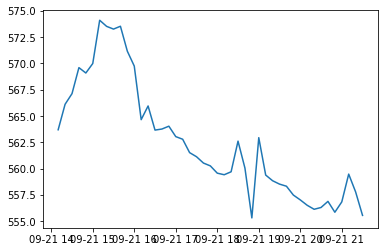

In [12]:
exp17 = train_unlabeled.query(f"Параметр >= '2021-09-21 14:10:00' and Параметр <= '2021-09-21 21:30:00'")
plt.plot(exp17['Параметр'], exp17['х001'])
plt.show()

__Данные без аномалий:__

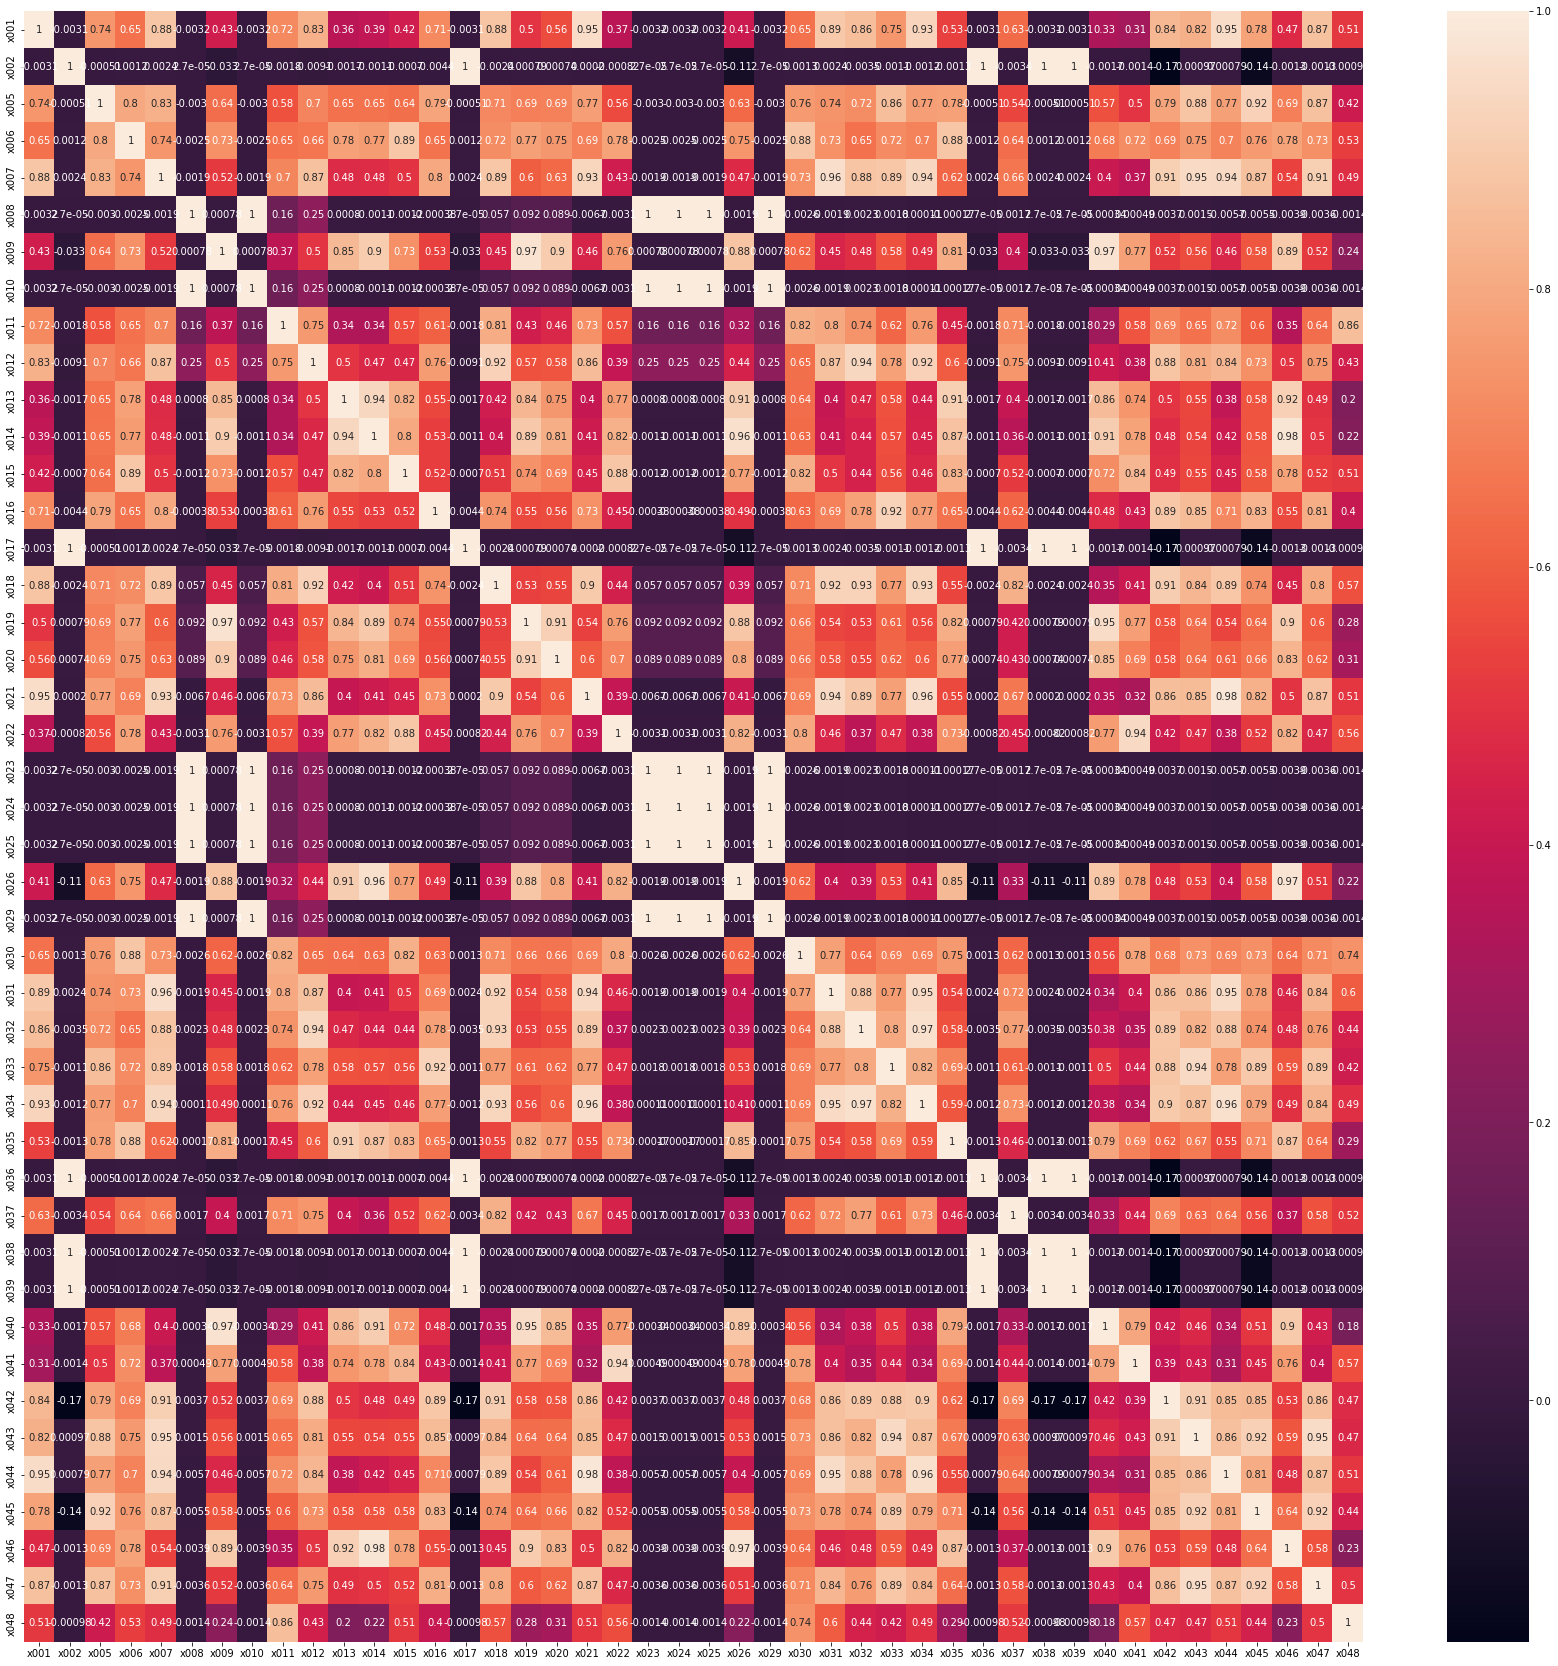

In [7]:
plt.figure(figsize=(30, 30))
display(Markdown('__Данные без аномалий:__'))
sns.heatmap(train_unlabeled.corr(), annot = True, fmt='.2g');

# можно заметить, что много признаков скореллированы (например 2, 17, 36, 38, 39)
# это нужно учитывать при выборе метода